# TQQQ Stock Predictor Project

#### Author: James Cho

#### Course Project, UC Irvine, Math 10, Fall 24

I would like to post my notebook on the course's website. [Yes]

## I) Introduction

The purpose of this project is to predict the price of the TQQQ stock, and I specifically chose TQQQ because this is my main stock that I have invested in and plan to invest in the future. The following data set is the price of TQQQ from 01/01/2011 to 01/01/2024, and I will be using feature engineering, linear regression, and model evaluation to determine the prediction of this stock.  

## II) Importing Data

In the following, I will download Yahoo Finance and import the necessary libraries.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ticker = 'TQQQ'
start_date = '2011-01-01'
end_date = '2024-01-01'

data = yf.download(ticker, start=start_date, end=end_date)

print(data.head())

[*********************100%***********************]  1 of 1 completed

Price      Adj Close     Close      High       Low      Open    Volume
Ticker          TQQQ      TQQQ      TQQQ      TQQQ      TQQQ      TQQQ
Date                                                                  
2011-01-03  0.777172  0.805000  0.820885  0.790573  0.790677  66758400
2011-01-04  0.775966  0.803750  0.815313  0.788385  0.815104  65760000
2011-01-05  0.795224  0.823698  0.824063  0.794740  0.795781  61440000
2011-01-06  0.802415  0.831146  0.833073  0.821510  0.826615  52262400
2011-01-07  0.800554  0.829219  0.836771  0.805156  0.835365  76204800


In order to avoid any errors, the data can be saved for future use.

In [2]:
data.to_csv('TQQQ_data.csv')

## III) Sorting Data

After downloading the data, I am going to clean and preprocess the data, drop any null values, remove any unnecessary columns, and rename some columns to make the data set clearer/more organized. 

The original and cleaned dataset will be displayed to visualize a comparison between the two. 

In [3]:
original_data = data.copy()

cleaned_data = data.copy()
cleaned_data.dropna(inplace=True)
cleaned_data = cleaned_data.drop(columns=['Volume'])
cleaned_data.rename(
    columns={'Open': 'Opening Price',
        'High': 'Highest Price',
        'Low': 'Lowest Price',
        'Close': 'Closing Price',
        'Adj Close': 'Adjusted Closing Price'}, 
    inplace=True)


print("Original Data:")
print(original_data.head())
print("\nCleaned Data:")
print(cleaned_data.head())

Original Data:
Price      Adj Close     Close      High       Low      Open    Volume
Ticker          TQQQ      TQQQ      TQQQ      TQQQ      TQQQ      TQQQ
Date                                                                  
2011-01-03  0.777172  0.805000  0.820885  0.790573  0.790677  66758400
2011-01-04  0.775966  0.803750  0.815313  0.788385  0.815104  65760000
2011-01-05  0.795224  0.823698  0.824063  0.794740  0.795781  61440000
2011-01-06  0.802415  0.831146  0.833073  0.821510  0.826615  52262400
2011-01-07  0.800554  0.829219  0.836771  0.805156  0.835365  76204800

Cleaned Data:
Price      Adjusted Closing Price Closing Price Highest Price Lowest Price  \
Ticker                       TQQQ          TQQQ          TQQQ         TQQQ   
Date                                                                         
2011-01-03               0.777172      0.805000      0.820885     0.790573   
2011-01-04               0.775966      0.803750      0.815313     0.788385   
2011-01-05  

## IV) Data Exploration

To get a better understanding of the dataset, we want to see the general statistics of the graph and visualize the dataset through various charts such as the line graph, histogram, and the correlation heatmap. 

### General Statistics

In this section, general statistical overview are shown such as the mean, median, mode, standard deviation, etc.

In [4]:
print(cleaned_data.describe())

Price  Adjusted Closing Price Closing Price Highest Price Lowest Price  \
Ticker                   TQQQ          TQQQ          TQQQ         TQQQ   
count             3270.000000   3270.000000   3270.000000  3270.000000   
mean                15.847460     16.344687     16.701963    15.940602   
std                 18.367921     18.932647     19.343526    18.462385   
min                  0.526663      0.545521      0.585104     0.533854   
25%                  2.536822      2.627656      2.670417     2.575104   
50%                  8.446779      8.745417      8.893750     8.544583   
75%                 22.471020     23.162500     23.737501    22.375000   
max                 85.722473     88.570000     91.680000    87.660004   

Price  Opening Price  
Ticker          TQQQ  
count    3270.000000  
mean       16.341786  
std        18.939127  
min         0.550625  
25%         2.625937  
50%         8.736667  
75%        23.136250  
max        89.644997  


### Line Graph

Here, we will visualize how the Adjusted Closing Price has changed over the years. 

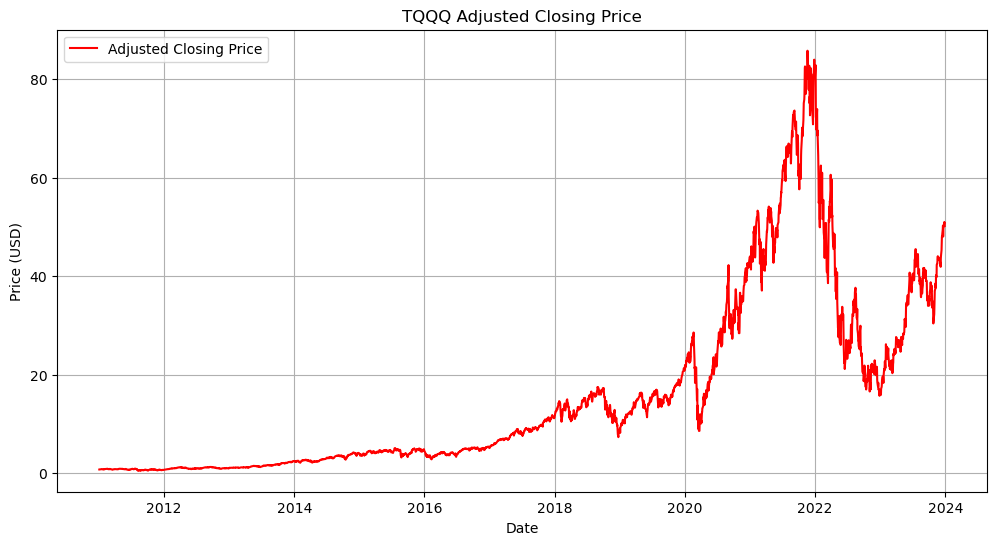

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data.index, cleaned_data['Adjusted Closing Price'], label='Adjusted Closing Price', color='red')
plt.title('TQQQ Adjusted Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

It can be easily observed from the line graph that the price has generally increased, but has peaked roughly around 2021-2022.

### Histogram

It is also important to see how the Adjusted Closing Price is distibuted because it shows how frequently the stock is traded at various price levels. Wide distribution implies high volatility and risk while narrow distribution indicates stability where there's low volatility and risk. 

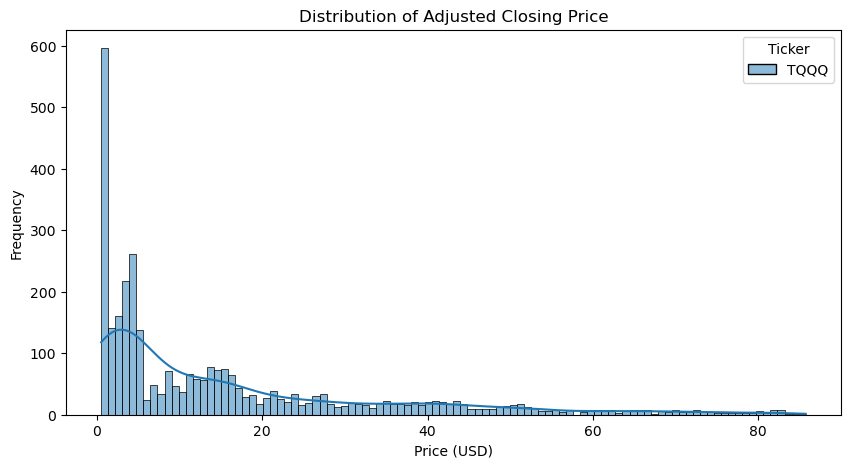

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data['Adjusted Closing Price'], bins=100, kde=True, color='purple')
plt.title('Distribution of Adjusted Closing Price')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

As you can see, the distribution of the Adjusted Closing Price is narrow and right-skewed, which indicated that this stock is low-risk, priced relatively low, and is generally stable with rare, significant price spikes.  

### Correlation Heatmap

To check for any potential predictors for price changes, correlation heatmaps can indicate those predictors by visualizing relationships between numerical vairables within the dataset. 

The indicators are known as **correlation cofficients**, and they range between -1 to 1. 
  - **1** Positive correlation
  - **0** No correlation
  - **-1** Negative correlation

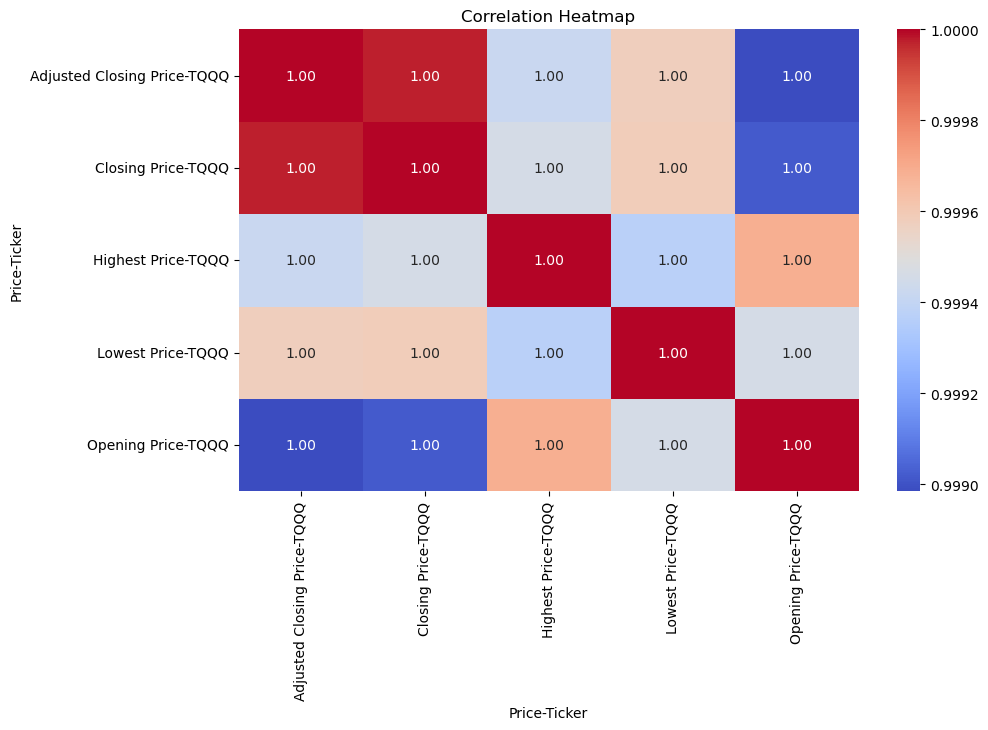

In [7]:
correlation_matrix = cleaned_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

From the heatmap above, it is clear that no matter what type of TQQQ price it is, they all have a very strong positive correlation. 

## V) Lagged Prices and Moving Averages

Lagged prices are all the previous prices of the stock for a specific number of days. A good example of this is price of TQQQ a day or two ago. This is useful in determining the future price of TQQQ because they can influence today or the future price. In other words, they can be helpful when it comes to predictions. 

Moving averages are also very useful because they can make the graph line look "smoother" due to it picking up on trends and noise that the model can remove. This is important when it comes to predicting TQQQ prices to see where the general trend is heading to, whether if it's rising or falling. 

The following code will prepare the TQQQ dataset for the upcoming section: linear regression.

In [8]:
lag_days = [1, 2, 3]  

# For lagged prices
for lag in lag_days:
    data[f'Lag_{lag}_Price'] = data['Adj Close'].shift(lag)

# For moving averages
moving_avg_days = [5, 10, 20] 
for ma in moving_avg_days:
    data[f'MA_{ma}'] = data['Adj Close'].rolling(window=ma).mean()

processed_data = data.dropna()

print(processed_data.head())
print(processed_data.tail())


Price      Adj Close     Close      High       Low      Open     Volume  \
Ticker          TQQQ      TQQQ      TQQQ      TQQQ      TQQQ       TQQQ   
Date                                                                      
2011-01-31  0.803118  0.831875  0.838125  0.804688  0.822969   79987200   
2011-02-01  0.847719  0.878073  0.883854  0.847813  0.851042  101721600   
2011-02-02  0.843898  0.874115  0.883125  0.868594  0.873438   46060800   
2011-02-03  0.847166  0.877500  0.882240  0.848281  0.869271   65779200   
2011-02-04  0.862452  0.893333  0.894792  0.871771  0.879740   67968000   

Price      Lag_1_Price Lag_2_Price Lag_3_Price      MA_5     MA_10     MA_20  
Ticker                                                                        
Date                                                                          
2011-01-31    0.791403    0.855966    0.839775  0.823443  0.822835  0.815755  
2011-02-01    0.803118    0.791403    0.855966  0.827596  0.821884  0.819282  
2011

The following code will visualize the dot plots between the closing prices, lagged prices, and the moving averages. I have tried my best to make the lines the most distinguishable. 

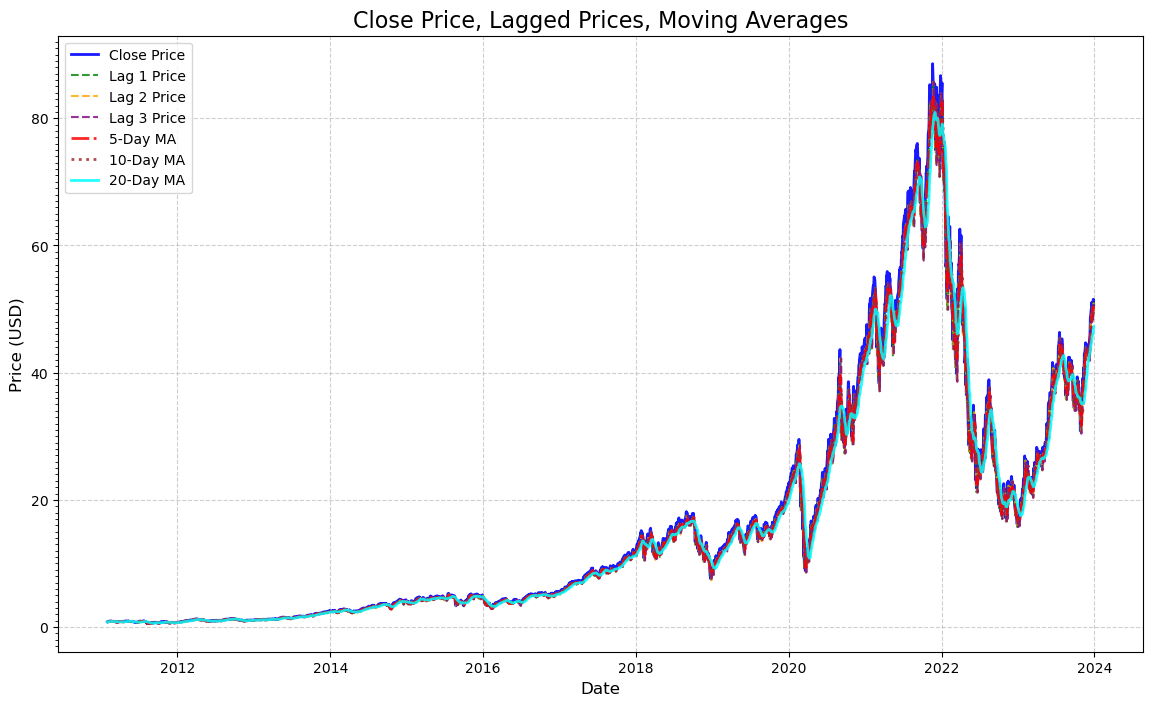

In [9]:
plt.figure(figsize=(14, 8))

# For original closed prices
plt.plot(processed_data.index, processed_data['Close'], 
         label='Close Price', color='blue', linewidth=2, alpha=0.9)

# For lagged prices
lag_colors = ['green', 'orange', 'purple']
for lag, color in zip([1, 2, 3], lag_colors):
    plt.plot(processed_data.index, processed_data[f'Lag_{lag}_Price'], 
             label=f'Lag {lag} Price', linestyle='--', color=color, linewidth=1.5, alpha=0.8)

# For moving averages
ma_styles = ['-.', ':', '-']
ma_colors = ['red', 'brown', 'cyan']
for ma, style, color in zip([5, 10, 20], ma_styles, ma_colors):
    plt.plot(processed_data.index, processed_data[f'MA_{ma}'], 
             label=f'{ma}-Day MA', linestyle=style, color=color, linewidth=2, alpha=0.85)

plt.title('Close Price, Lagged Prices, Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)

plt.gca().yaxis.set_major_locator(mticker.AutoLocator())
plt.gca().yaxis.set_minor_locator(mticker.MultipleLocator(1))  # Adjust minor tick spacing if needed
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



## VI) Linear Regression

Linear regression is a technique that learns the models or dataset between the dependent and independent variables to generate predictions. This is visualized as a line that best fits the data. 

This is obviously very useful in this project since the definition itself is essentially what this project is about: predictions. 

It is good that lagged prices and moving averages were defined and cleared up in the previous section, and those factors are one of the major building blocks of linear regression. 

### Data Preparation

For independent variables, we would only need relevant predictors, which will be the features mentioned beforehand, and drop any unnecessary columns that we won't use, which in this case will be all the prices that are not the closing price. 

For dependent variables, this will be the closing price and adjusted closing prices for the upcoming days. 

We also want to prepare the training and testing models for the next section by splitting the data into training and testing sets. We will use the 80-20 train-test split. 

In [10]:
features = ['Lag_1_Price', 'Lag_2_Price', 'Lag_3_Price', 'MA_5', 'MA_10', 'MA_20']
target = 'Adj Close'  

X = processed_data[features] 
y = processed_data[target]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Training data size: (2600, 6)
Testing data size: (651, 6)


### Building the Regression Model

Here is where we build the linear regression model through the training set so the model can learn the relationship between the independent and dependent variables, cut any removable noise, and examine coefficients for better predictions. 

In [11]:
# Define features and target
features = ['Lag_1_Price', 'Lag_2_Price', 'Lag_3_Price', 'MA_5', 'MA_10', 'MA_20']
target = 'Adj Close'

# Ensure all columns exist (to avoid Value Errors)
if not all(col in processed_data.columns for col in features + [target]):
    raise ValueError("Some required columns are missing in the dataset.")

# Prepare feature matrix (X) and target vector (y)
X = processed_data[features].dropna().to_numpy()  
y = processed_data[target].dropna().to_numpy()  

# Ensure y is 1-dim (to avoid Value Errors)
y = y.ravel()

# Split data into training-testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start an train the Linear Regression model 
model = LinearRegression()
model.fit(X_train, y_train)

# Display coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_})

print("Linear Regression Coefficients:")
print(coefficients)

Linear Regression Coefficients:
       Feature  Coefficient
0  Lag_1_Price    -0.151225
1  Lag_2_Price    -0.578373
2  Lag_3_Price    -0.978489
3         MA_5     3.096734
4        MA_10    -0.447328
5        MA_20     0.059459


### Evaluating the Model

We will now evaluate the model by using such metrics like the Mean Absolute Error, Mean Squared Error, and R-squared error ot test the model's performance. All these metrics are important to see how the regression model predicts the stock prices. 

In [12]:
# Predict the target values 
y_pred = model.predict(X_test)

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.2793619982651877
Mean Squared Error (MSE): 0.31413069934276044
R-squared (R²): 0.9990696878500049


### Visualization of the Model

Now, we will create a graph to visualize the stock prices (actual vs. predicted prices). 

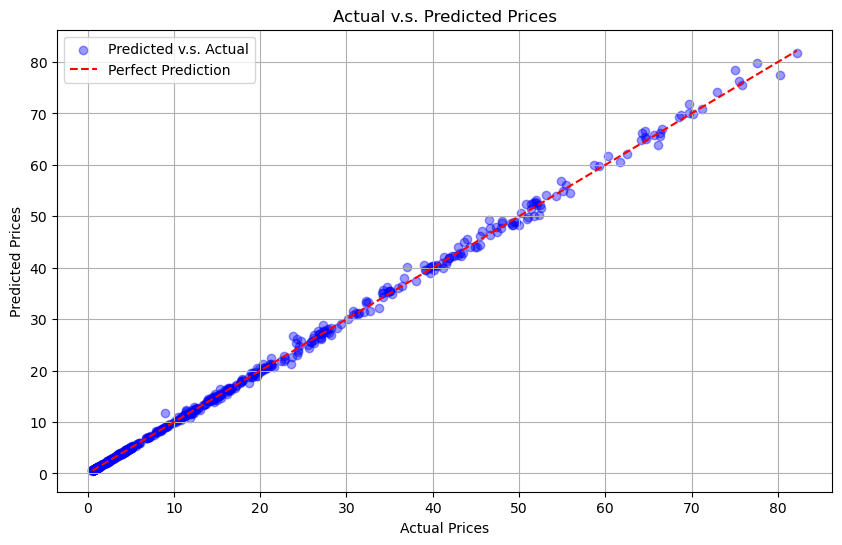

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='blue', label='Predicted v.s. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual v.s. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


We noticed that there are two plots on this graph: scatter plts and a diagonal line. The scatter plot compared the prices between the actual and predicted price, while the diagonal line shows the perfect prediction of the price. 

The closer the dots are to the line, the better the model is. 

## VII) Discussion of Results and Potential Improvements

#### Now that we have:

- Imported and cleaned the data
- Explored the data where we created different graphs
- Got a better understanding of the data
- Picked up on moving averages and lagged prices
- Built the linear regression model using those lagged prices and moving averages
- Trained the model on the data
- Evaluated the data using MAE, MSE, and R^2
- Visualized actual vs predicted stock prices

We can now reflect on the model's performance.

### Model Performance

Based on the model's evaluation metrics (MAE, MSE, and R²), the model performed extremely well in predicting TQQQ prices. To go further in depth:
- **MAE:** averages all the errors in the prediction, so the smaller the MAE, the better. In our case, we got a value of 0.279, which is excellent. In general, the MAE value shows that the model's performance is superb. 


- **MSE:** similar concept to MAE where the smaller the MSE, the better. The difference is that MSE are sensitive to larger errors much more than MAE, so the value would be higher than MAE. From this model, we got MSE=0.314. Although it's higher than the MAE, it is still a significantly small number, which proves that the model performed very well. 


- **R²:** measures how much variance there are in TQQQ prices, and R² ranges from [0,1] where 0 indicates that the data does not fit the regression model at all while 1 indicates that the data does fit the regression model very well. Here, we recieved R²=0.99906, proving that the data fits the regression model almost perfectly. 

In general, after reflecting on the metric values of MAE, MSE, and R², we can conclude that the model performed **extremely well**.

### Limitations of Linear Regression
Although using linear regression models can be helpful and is a strong strategy to predict values based on the dataset, it does have its limitations.
- In the finance world, not everything is linear and may have non-linear trends in the stock market, and the linear regression may not be able to capture those specific trends.


- The finance world is not only influenced by its numbers. It is vastly influenced by multiple factors such as world economic events (macro or/and micro), geopolitical events, connections to other stocks, etc. Using linear regression and its features (lagged prices and moving averages) do not take those factors into considerations in the model.

## VIII) Tree-Based Model
As mentioned earlier, linear regressions has a limitation where it cannot capture non-linear trends. This is where the **tree based model** deems to be useful in this situation.

#### What can the Tree-based Model do that the Linear Regression Model can't?
- Tree-based models (TBM) can capture non-linear trends between features, such as lagged prices and moving averages, and the target. Since the stock markets are filled with non-linear relationships and trends, TBMs can vastly improve this model's performance. 
- TBMs are much more resistant to outliers compared to linear regression models, so naturally, TBMs takes care of the need to scale. 
- Overall, TBMs can reduce variance and improve predictions thanks to certain TBM models creating multiple "trees."

### Install Required Libraries
In order to use tree-based models, we need to install the required libraries

In [14]:
pip install scikit-learn xgboost lightgbm

Note: you may need to restart the kernel to use updated packages.


### Train-Test a Tree Based Model

We can now train-test a tree based model. We will use a simple 80-train/20-test split and then train a random forest to make predictions. Then, we will also incorporate the same evaluation metrics that we have used previously. 

In [18]:
from sklearn.ensemble import RandomForestRegressor
# Features (X) and Target (y)
X = processed_data[['Lag_1_Price', 'Lag_2_Price', 'MA_5', 'MA_10', 'MA_20']]
y = processed_data['Adj Close']

# Prevent 2D column vector and 1D array mix-ups
y = y.values.ravel()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - MAE: {mae}")
print(f"Random Forest - MSE: {mse}")
print(f"Random Forest - R²: {r2}")

Random Forest - MAE: 0.47689498255879115
Random Forest - MSE: 0.9780074029303077
Random Forest - R²: 0.9971035872277534


### Random Forest Model Performance
Again, based on the model's evaluation metrics (MAE, MSE, and R²), the model still performed extremely well in predicting TQQQ prices. In addition, the metrics also have more credibility since the metrics took consideration to non-linear trends.

Here is the model performance summary between linear regression and random tree:

| Model             | MAE   | MSE    | R²   |
|--------------------|-------|--------|------|
| Linear Regression | 0.2794  | 0.3141  | 0.9991 |
| Random Forest      | 0.4768  | 0.9770  | 0.9971 |


- **MAE:** we got value of 0.477, which is excellent. Although it is higher than the linear regression model's MAE, TBM's MAE is still highly reliable due to its low number and taking non-linear trends into consideration.


- **MSE:** we got value of 0.977. Again, although it's higher than the linear regression MSE, it is still a significantly small number and took non-linear trends into consideration.


- **R²:** we recieved value of 0.997, which is not even a big difference from the linear regression R² value of 0.99906. The TBM's R² being that high all while taking non-linear relationships into consideration shows that this model performed extremely well. 

In general, it makes sense that the metric numbers from the TBM is very slightly worse due to it taking non-linear trends into consideration. In addition, those same metric numbers are still very good, proving that this model not only improved its credibility, but also proved that the model performed very well overall. 

### Limitations of Tree-Based Models
Although Tree-Based Models are much more useful and helpful compared to the linear regression model, it still has its limitations.
- If the dataset is too small, the decision trees would easily **overfit** by it making a complex tree due to it having too little data to work with. In addition, if the decision tree is coded to train to its full potential (no matter the size of the dataset), the branch would hit every single data point, making the tree model be very difficult to interpret. 


- Since linear regressions have a more straightforward mathmematical concept, it's **easier to interpret linear regression models** compared to tree based models.

## IX) Cross Validation and Bias-Variance Tradeoff

### Cross Validation

Cross validation is crucial when it comes to testing the model's robustness, and it can help the model's performance to be more consistent, make overfitting or underfitting to be less likely to the training set or the whole data, respectfully. 

In [19]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression
lr_cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Linear Regression Cross-Validation MAE (5-fold): {-lr_cv_scores.mean():.2f}")

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Random Forest Cross-Validation MAE (5-fold): {-rf_cv_scores.mean():.2f}")


Linear Regression Cross-Validation MAE (5-fold): 0.42
Random Forest Cross-Validation MAE (5-fold): 1.45


Like mentioned previously, the lower the MAE, the more consistent the predictions are as a whole in cross-validation folds. 

- Linear Regression Cross Validation: we have MAE of 0.42, which shows that this model is less prone to overfitting and more resistant to noise. However, we discussed that LR's are don't capture non-linear trends. 

- Random Forest Cross Validation: we have MAE of 1.45, which is much higher than the LR's MAE. However, this is still a low MAE number considering the fact that the RF took non-linear aspects into consideration. However,  it is still overfitting in some areas which could be due to it being too complext for this dataset. 


### Bias-Variance Tradeoff

Between the two models, the LR model has higher bias due to it only picking up on linear relationships and trends between its features and the target, and the stock market and the finance world has lots of complex relationships that the LR does not pick up on. On the other hand, the RF model does has lower bias, but has higher variance due to it picking up on more complex relationships and trends from the dataset. 


## X) Summary

To recall, this project aimed to predict TQQ stock prices through machine learning techniques such as linear regression and tree-based models. We first collected the dataset of those prices from 01/01/2011 to 01/01/2024 and received that data using Yahoo Finance API and cleaned the data. To get a better understanding of the dataset, we also calculated basic statistics and visualized the dataset through distributions, line graphs, and a correlation heatmap. Next, we utilized features such as lagged prices and moving averages and visualized them to see how they compare to the closed price. We then built the linear regression model, made some evaluations to help us reflect on the performance, visualized the model, and reflected on it to see if any improvements could be made. Afterwards, we considered the reflection to create a better model: a tree-based model. Just like the linear regression model, we train-tested the model and acquired metrics (such as the MAE, MSE, and R²), and reflected on the model's performance and what its limitations are. Finally, we discussed the cross-validation and bias-variance tradeoff between the two models. 

## XI) References

1. [**Linear Regression, Visualizations, Correlation Heatmap, Train-Test Method, Lagged Prices, and Evaluation Metrics**](https://rayzhangzirui.github.io/math10fa24/notes/notes_intro.html)  
   Notes and concepts referenced to help with the project.
   

2. [**Stock Prices for TQQQ**](https://finance.yahoo.com/quote/TQQQ/)  
   Source of the TQQQ stock data used in this project.
   

3. [**yfinance Library Documentation**](https://pypi.org/project/yfinance/)  
   The `yfinance` library was used to download and use the data for the TQQQ stock.
   

4. [**sklearn Library Documentation**](https://scikit-learn.org/)  
   The `sklearn` library was used for machine learning models.
   

5. [**pandas Library Documentation**](https://pandas.pydata.org/)  
   The `pandas` library used data manipulation, cleaning, and processing.
   

6. [**numpy Library Documentation**](https://numpy.org/)  
   The `numpy` library was used for computations and array handling.


7. [**matplotlib Library Documentation**](https://matplotlib.org/)  
   The `matplotlib` library was used to create visualizations.


8. [**seaborn Library Documentation**](https://seaborn.pydata.org/)  
   The `seaborn` library was used to generate correlation heatmaps and other visualizations.
   

9. [**Tree-Based Models**](https://www.researchgate.net/publication/378435618_Stock_price_prediction_using_decision_tree_classifier_and_LSTM_network)  
   Research on tree-based models for better stock price prediction.


